# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data/text

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [2]:
# matplotlib.pyplot, seaborn, pandas, nltk, unicodedata, re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [3]:
# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [4]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
#acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [7]:
# how many spam and ham observations do we have?
df.label.value_counts(normalize=True)


ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
df.head(2)

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [11]:
# ' '.join(df[df.label == 'ham'].text)

In [12]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [14]:
a_list = ['wordone', 'wordtwo']

In [15]:
a_Series = pd.Series(a_list)

In [16]:
a_list

['wordone', 'wordtwo']

In [17]:
a_Series

0    wordone
1    wordtwo
dtype: object

In [19]:
'hamsandwich'.join(a_list)

'wordonehamsandwichwordtwo'

In [13]:
ham_words[:1000]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni u dun say so early hor u c already then say nah i dont think he goes to usf he lives around here though even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times i have a date on sunday with will oh kim watching here eh u remember how 2 spell his name yes i did he v naughty make until i v wet fine if thataos the way u feel thataos the way its gota b is that seriously how you spell his name ium going

## Exploration

Represent text as word frequencies.

In [20]:
# splitting the entire sub-corpus of total words in a class type by spaces,
# turning the list output by split into a Series, then getting that value_counts()
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq =pd.Series(all_words.split()).value_counts()

In [21]:
ham_freq

i           2305
you         1837
to          1554
the         1118
a           1055
            ... 
wellyou        1
daywith        1
nighters       1
asusual1       1
asus           1
Length: 7555, dtype: int64

In [22]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']

In [23]:
word_counts.head(3)

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

In [24]:
# sort by 'all'

word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [25]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['ham', 'spam'], ascending=[True, False]).head(20)

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
18,0,43,43
awarded,0,38,38
a1000,0,35,35
150ppm,0,34,34
a2000,0,31,31


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

In [28]:
# word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']]

Text(0.5, 1.0, 'Ham vs Spam Count for top 20 Most Frequent Overall Words')

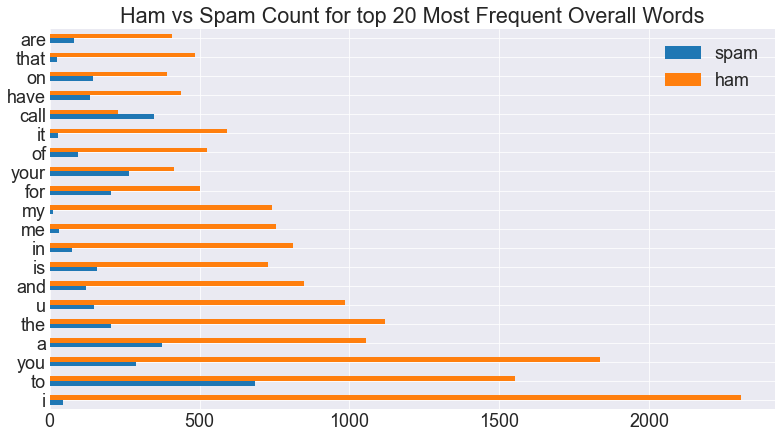

In [30]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']].plot.barh()
plt.title('Ham vs Spam Count for top 20 Most Frequent Overall Words')

In [37]:
# word_counts.sort_values('all', ascending=False)\
#  .head(20)\
#  .apply(lambda row: row/row['all'], axis = 1)

<AxesSubplot:>

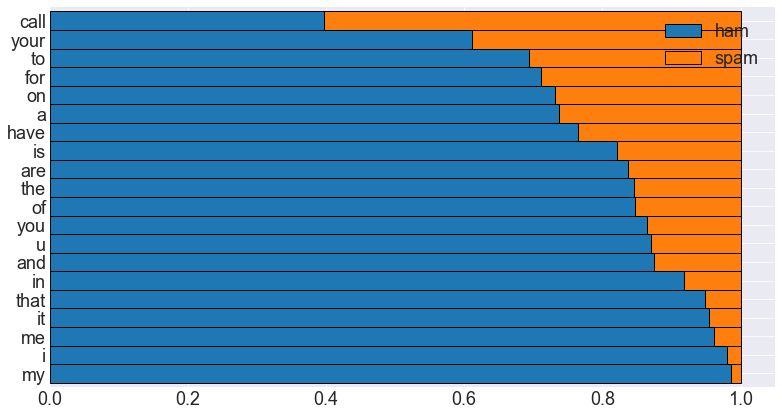

In [38]:
(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all').
 sort_values('spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

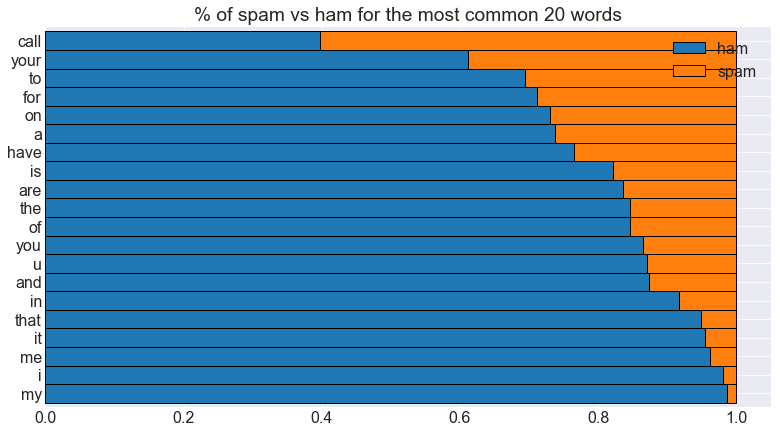

In [39]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 words')

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

In [40]:
sentence = 'Today is tuesday, and it is very warm.'

In [45]:
list(nltk.bigrams(sentence.split()))

[('Today', 'is'),
 ('is', 'tuesday,'),
 ('tuesday,', 'and'),
 ('and', 'it'),
 ('it', 'is'),
 ('is', 'very'),
 ('very', 'warm.')]

**Be Careful!** Make sure you are making bigrams out of *words*.

In [46]:
# reminder: do NOT do: bigrams(sentence)
# do: bigrams(sentence.split())

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

Text(0.5, 1.0, 'Ten Most Common Bigrams Overall')

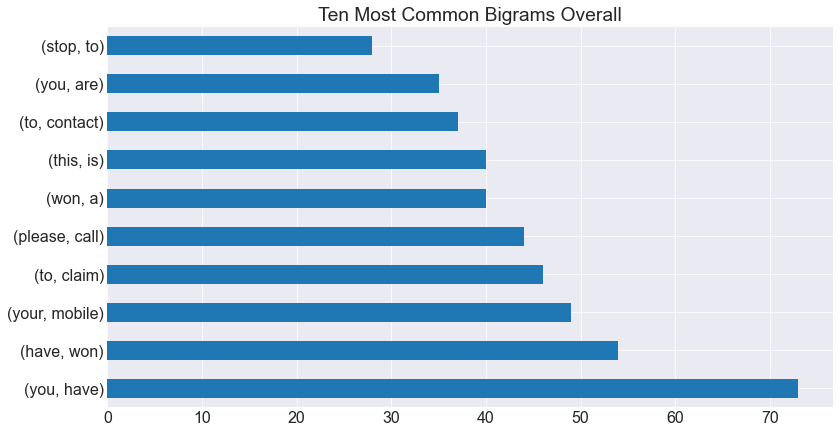

In [48]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Ten Most Common Bigrams Overall')

Text(0.5, 1.0, 'Ten Most Common Bigrams Overall')

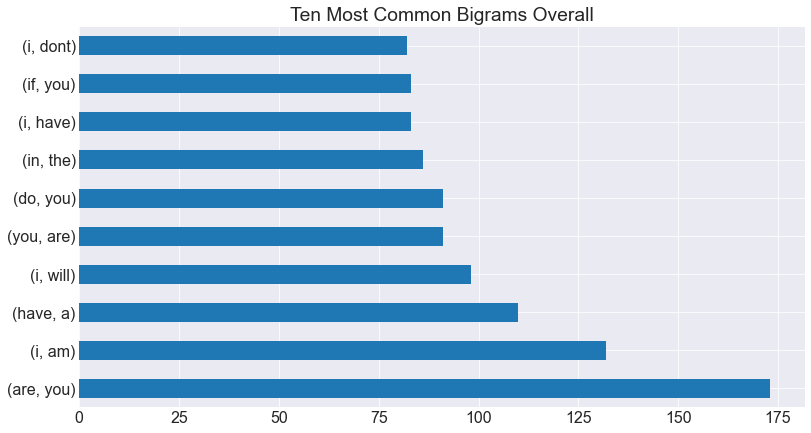

In [49]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Ten Most Common Bigrams Overall')

## Word Cloud

`python -m pip install --upgrade wordcloud`

documentation: https://amueller.github.io/word_cloud/

In [50]:
spam_words[:100]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry'

(-0.5, 799.5, 599.5, -0.5)

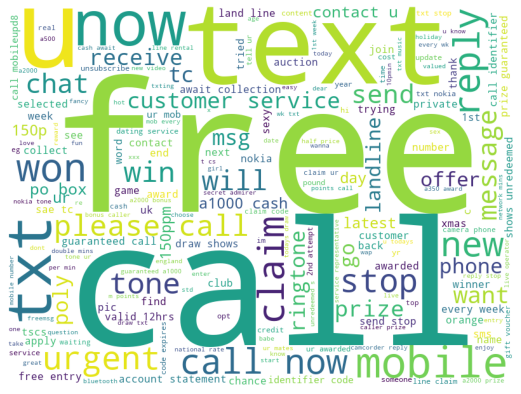

In [51]:
from wordcloud import WordCloud
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

In [63]:
ham_bigrams = ' '.join(pd.Series((nltk.bigrams(ham_words.split()))).astype('string'))

(-0.5, 799.5, 599.5, -0.5)

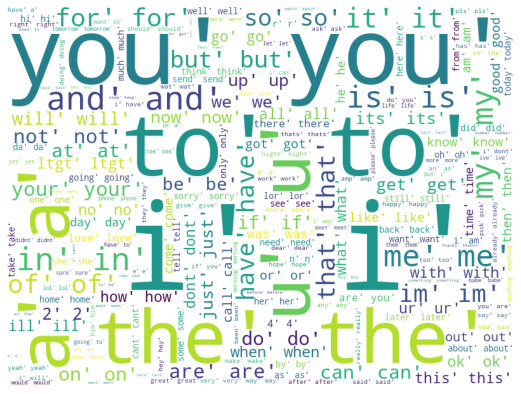

In [64]:
from wordcloud import WordCloud
img = WordCloud(background_color='white', width=800, height=600).generate(ham_bigrams)
plt.imshow(img)
plt.axis('off')

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [65]:
len('some string')

11

In [66]:
# add two new columns 'message_length' and 'word_count'

df['message_length'] = df.text.apply(len)

df['word_count'] = df.text.apply(clean).apply(str.split).apply(len)

df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [67]:
# potential statistical testing opportunity:
# is the average message length of ham texts greater/less/different than spam texts?
# t-test hint hint

## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - combination of qualitative and quantitative methods
    - then empirically validate
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([github](https://github.com/cjhutto/vaderSentiment) + [whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)) `nltk.sentiment.vader.SentimentIntensityAnalyzer`. Pre-trained sentiment analyzer (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).)


From your terminal:
`python -c 'import nltk;nltk.download("vader_lexicon")'`

In [68]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [69]:
type(sia)

nltk.sentiment.vader.SentimentIntensityAnalyzer

In [75]:
sia.polarity_scores('They are really good!!!')

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.6211}

In [71]:
sia.polarity_scores('They are REALLY good')

{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6028}

In [72]:
sia.polarity_scores('They are very good!!!')

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.6211}

In [73]:
sia.polarity_scores('The food is good but service is slow')

{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.2382}

In [88]:
sia.polarity_scores('They are good :)')

{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.7096}

In [83]:
sia.polarity_scores('The food sucks')

{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}

Things that can influence Sentiment Score:
1. Punctuations. Can increase the intensity
2. Capitalization. Can increase the intensity
3. Degree modifiers
4. Conjunctions

It can handle Emojis and slangs

Apply this to the text message data

In [89]:
df['sentiment'] = df.text.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [90]:
df.head()

,label,text,message_length,word_count,sentiment
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,-0.1027


In [91]:
# is the mean and median values of sentiment score different for ham vs spam?
df.groupby('label').sentiment.agg(['mean', 'median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


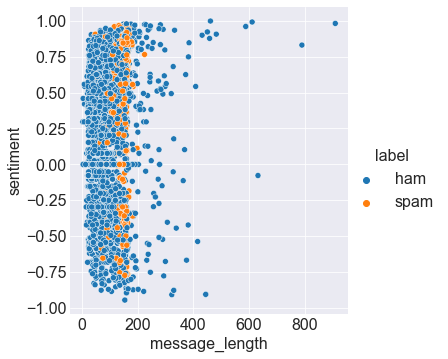

In [92]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')

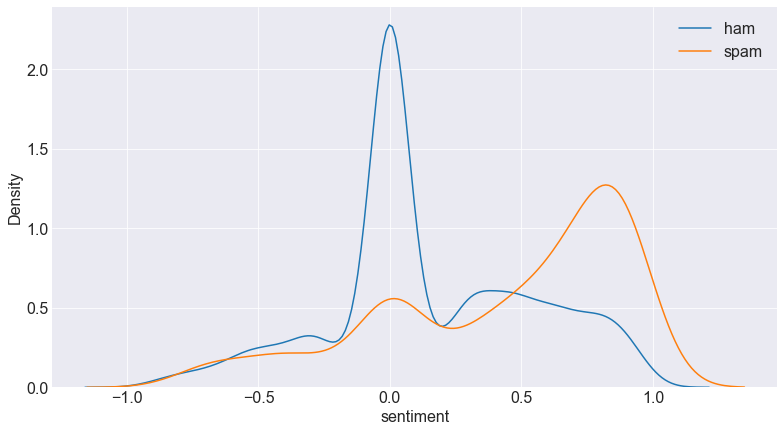

In [93]:
# is the distribution for sentiment different for ham vs spam
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
plt.legend(['ham', 'spam'])

/opt/homebrew/anaconda3/envs/homebase/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/envs/homebase/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

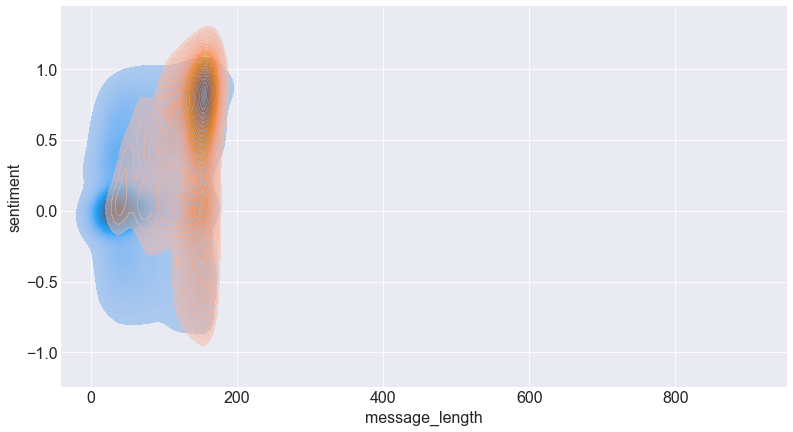

In [94]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(df[df.label == 'ham'].message_length,df[df.label == 'ham'].sentiment, levels = 30, shade = True )
sns.kdeplot(df[df.label == 'spam'].message_length,df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 )